<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.backend import clear_session
from tensorflow.keras.applications import MobileNetV2, ResNet50V2, VGG16, InceptionV3
from tensorflow.keras.applications import mobilenet_v2, resnet_v2, vgg16, inception_v3

%matplotlib inline

In [2]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
plt.style.use('ggplot')

## Load data
Use the **Keras**' load method.

In [5]:
# Add the following two lines if you receive a 'ssl' error upon execution 
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Download CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

* 50,000 images in the training set
* 10,000 images in the test set
* square images with 32×32 pixels
* 3 color channels: RGB

In [ ]:
# Color channel for first image and first pixel (top left)
train_images[0][0][0]

array([59, 62, 63], dtype=uint8)

In [ ]:
# Color channels for first image and first row
train_images[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [ ]:
# Minimum and maximum pixel value
np.min(train_images), np.max(train_images)

(0, 255)

In [ ]:
train_labels[:5] #6: frog

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Subset data

In [ ]:
# Adjust sample size as required
train_size = 25000
test_size = 5000

X_train = train_images[:train_size,:,:,:]
y_train = train_labels[:train_size,:]
X_test = test_images[:test_size,:,:,:]
y_test = test_labels[:test_size,:]

## Copy image data

In [6]:
X_train = train_images.copy()
y_train = train_labels.copy()
X_test = test_images.copy()
y_test = test_labels.copy()

## Check some data

In [7]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

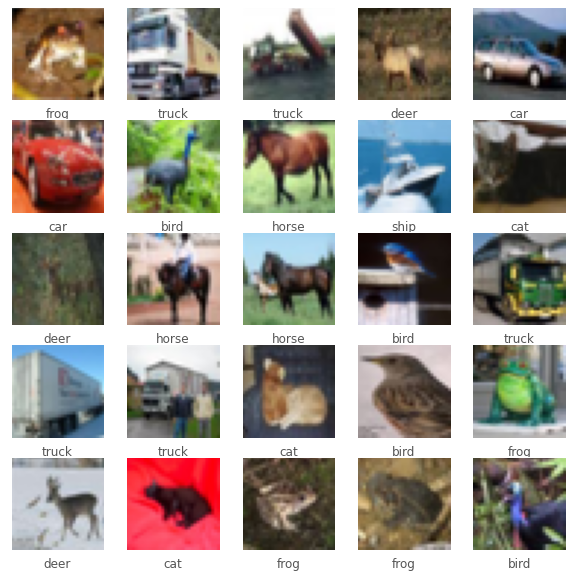

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.xticks([]) # disable xticks
    plt.yticks([])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i][0]]);

In [8]:
# Function from answer sheet

def check_one_image(data, label, id = None, actual = None, compare = False):
    # Check one image
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (2,2))
    plt.imshow(im)
    
    # Label
    l_id = label[id]
    if np.all((compare) and (actual is not None) and (l_id != np.argmax(actual[id]))):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([]);

In [9]:
# Function from answer sheet

def check_ten_images(data, label, actual = None, compare = False):
    # Check ten images
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 8})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

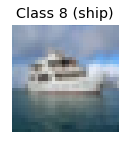

In [ ]:
check_one_image(data=X_train, label=y_train.flatten())

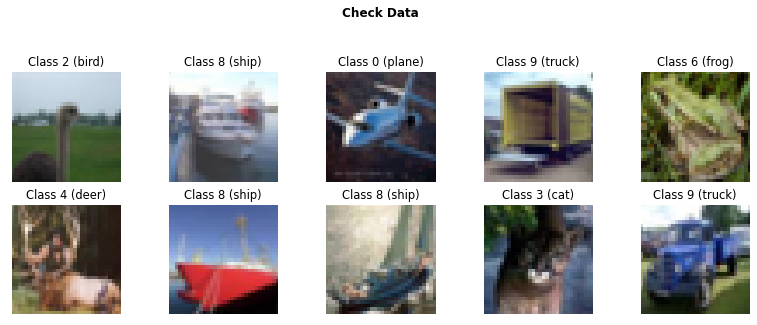

In [ ]:
check_ten_images(data=X_train, label=y_train.flatten())

## Prepare data for pre-trained models 

In [30]:
# Preprocess images the same way as images used to develop the (pre-trained) model

# MobileNetV2
# prepared_images = mobilenet_v2.preprocess_input(X_train)

# VGG16
prepared_images = vgg16.preprocess_input(X_train)

# ResNet50V2
# prepared_images = resnet_v2.preprocess_input(X_train)

# InceptionV3
# prepared_images = inception_v3.preprocess_input(X_train)

In [31]:
prepared_images[0][0]

array([[-0.5372549 , -0.5137255 , -0.5058824 ],
       [-0.6627451 , -0.6392157 , -0.64705884],
       [-0.60784316, -0.62352943, -0.6627451 ],
       [-0.46666664, -0.5764706 , -0.67058825],
       [-0.23137254, -0.42745095, -0.5921569 ],
       [-0.06666666, -0.2862745 , -0.5058824 ],
       [ 0.09019613, -0.1607843 , -0.41176468],
       [ 0.13725495, -0.1372549 , -0.372549  ],
       [ 0.1686275 , -0.08235294, -0.30196077],
       [ 0.1686275 , -0.05882353, -0.27058822],
       [ 0.02745104, -0.19215685, -0.3960784 ],
       [-0.01960784, -0.2235294 , -0.40392154],
       [ 0.11372554, -0.09803921, -0.2862745 ],
       [ 0.12941182, -0.12156862, -0.32549018],
       [ 0.07450986, -0.17647058, -0.38039213],
       [ 0.01176476, -0.23921567, -0.44313723],
       [ 0.07450986, -0.16862744, -0.38039213],
       [ 0.05098045, -0.16862744, -0.40392154],
       [-0.02745098, -0.23921567, -0.4980392 ],
       [ 0.09019613, -0.11372548, -0.38823527],
       [ 0.09019613, -0.12156862, -0.411

## Prepare data

**Resize images**

In [ ]:
# use OpenCV if required

**Reshape data**

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# Dataset already has the correct input shape, otherwise execute ...
# X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
# X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))

In [10]:
_, img_rows, img_cols, img_channels = X_train.shape

**Encode target variable**

In [8]:
# One hot encode target values
num_classes = len(set(y_train.flatten())) # set() returns distinct elements

y_train = to_categorical(y_train, num_classes = 10, dtype = 'uint8')
# y_train = to_categorical(y_train, num_classes = num_classes, dtype = 'uint8')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'uint8')

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [12]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

**Optional pixel scaling**

In [ ]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [9]:
# Convert data to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [ ]:
# Baseline model: 1x VGG block
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # (3, 3) equals kernel_size=3
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (img_rows, img_cols, img_channels)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) # (2, 2) equals pool_size=2

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               802944    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                      

In [10]:
# Baseline model: 2x VGG blocks
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
# Model from Answer sheet (shows multiple VGG blocks)

model = models.Sequential()
model.add(layers.Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(layers.Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(layers.Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 48)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 48)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 96)        41568     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 96)        83040     
                                                      

In [ ]:
# Model from Answer sheet (adjusted #3)

model = models.Sequential()
model.add(layers.Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 48)       192       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 48)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 48)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 96)       

## Pre-trained models

In [ ]:
# Load model and inspect
MobileNetV2().summary()

In [ ]:
# Load model and inspect
VGG16().summary()

In [ ]:
# Load model and inspect
# Note! Model run does not finish
ResNet50V2().summary()

In [ ]:
# Load model and inspect
# Note! Input needs to be at least 75x75
InceptionV3().summary() 

In [ ]:
# Load model without classifier layers
model = VGG16(include_top=False, input_shape=(32, 32, 3))

# Add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
class1 = layers.Dense(512, activation='relu')(flat1)
output = layers.Dense(10, activation='softmax')(class1)

# Define new model
model = models.Model(inputs=model.inputs, outputs=output)

# Summarize
model.summary()

## Compile the model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the training data

In [12]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [13]:
%%time

# Baseline models
epochs = 50
callbacks = [tensorboard]
batch_size = 100

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=0)

CPU times: user 2min 31s, sys: 9.85 s, total: 2min 41s
Wall time: 2min 24s


**Notes on baseline model runs performed:**
1. Answer sheet model with 25,000 train images (50 epochs): 3 min (colab GPU)
2. Answer sheet model with 50,000 train images (50 epochs): 6 min (colab GPU)
3. Adjusted #1 Answer sheet model (drop to 256, 128 nodes, dropout to 0.2) 50,000 train images (50 epochs): 6 min (colab GPU)
4. Adjusted #2 Answer sheet model (add BatchNormalization after Conv2D) with 50,000 train images (50 epochs): 7 min (colab GPU)
5. Adjusted #3 Answer sheet model (add BatchNormalization between Conv2D, dropout to 0.2) with 50,000 train images (50 epochs): 7 min (colab GPU)
6. Baseline 2x VGG blocks with 50,000 train images (50 epochs): 2 min (colab GPU)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
%%time

# Pre-trained models
epochs = 50
callbacks = [tensorboard]
batch_size = 100

history = model.fit(prepared_images, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=0)

**Notes on pre-trained model runs performed:**
1. MobileNetV2 with 50,000 train images (50 epochs): 15min (colab GPU)
2. VGG16 with 50,000 train images (50 epochs): 17min (colab GPU)

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir logs

# If error occurs, clear out content of
# C:\Users\stoll\AppData\Local\Temp\.tensorboard-info

## Create predictions

In [ ]:
%%time

predictions = model.predict(X_test)

313/313 [==============================] - 4s 8ms/step
CPU times: user 4.07 s, sys: 120 ms, total: 4.19 s
Wall time: 5.96 s


In [ ]:
# Predict returns array of predictions
print(predictions.shape)
predictions[0]

(10000, 10)


array([1.4386346e-06, 4.2592805e-09, 3.5735568e-05, 9.9724436e-01,
       3.8826453e-05, 2.5563838e-03, 1.1033172e-04, 1.0625631e-05,
       2.0160589e-06, 1.8756812e-07], dtype=float32)

In [ ]:
%%time

predictions = np.argmax(model.predict(X_test), axis=-1) # argmax returns the indices of the maximum values along an axis

313/313 [==============================] - 1s 3ms/step
CPU times: user 1.16 s, sys: 178 ms, total: 1.33 s
Wall time: 1.23 s


In [ ]:
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# %%time

# predictions = (model.predict(X_test) > 0.5).astype("int32")

157/157 [==============================] - 4s 23ms/step
Wall time: 3.71 s


In [ ]:
# predictions[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.2f}, Test accuracy: {test_acc:.2f}")

Test loss: 2.53, Test accuracy: 0.71


**Notes on baseline model evaluation:**
1. Answer sheet model with 25,000 train images (50 epochs): loss 0.91, acc 0.77
2. Answer sheet model with 50,000 train images (50 epochs): loss 0.61, acc 0.81
3. Adjusted #1 Answer sheet model with 50,000 train images (50 epochs): loss 0.68, acc 0.81
4. Adjusted #2 Answer sheet model with 50,000 train images (50 epochs): loss 0.76, acc 0.81
5. Adjusted #3 Answer sheet model with 50,000 train images (50 epochs): loss 0.75, acc 0.83
6. Baseline 2x VGG blocks with 50,000 train images (50 epochs): loss 2.53, acc 0.71


**Notes on pre-trained model evaluation:**
1. MobileNetV2 with 50,000 train images (50 epochs): loss 6.9, acc 0.22
2. VGG16 with 50,000 train images (50 epochs): loss 1.8, acc 0.63

## Learning curves

In [21]:
def learning_curve(history):
    """
    Function to plot training and validation loss and accuracy
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
    ax[0].plot(history.history["loss"], color="r", label="Training Loss")
    ax[0].plot(history.history["val_loss"], color="b", label="Validation Loss")
    ax[0].legend(loc="upper right")
    ax[0].set_xlabel("Epoch", fontsize=14)
    ax[0].set_ylabel("Loss", fontsize=14)
    ax[0].set_ylim([0, max(history.history["loss"])+5])
    ax[0].set_title("Training and Validation Loss", fontsize=16)
    
    ax[1].plot(history.history["accuracy"], color="r", label="Training Loss")
    ax[1].plot(history.history["val_accuracy"], color="b", label="Validation Loss")
    ax[1].legend(loc="best")
    ax[1].set_xlabel("Epoch", fontsize=14)
    ax[1].set_ylabel("Accuracy", fontsize=14)
    ax[1].set_ylim([0, max(history.history["accuracy"])+0.05])
    ax[1].set_title("Training and Validation Accuracy", fontsize=16);    

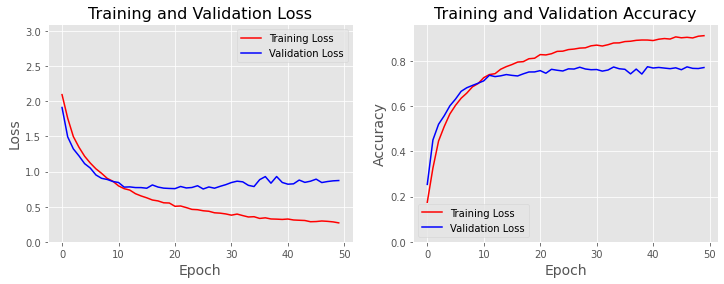

In [ ]:
# Answer sheet model (25,000 images)
learning_curve(history)

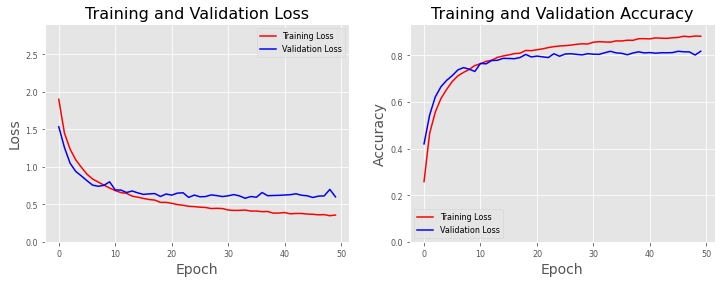

In [ ]:
# Answer sheet model (50,000 images)
learning_curve(history)

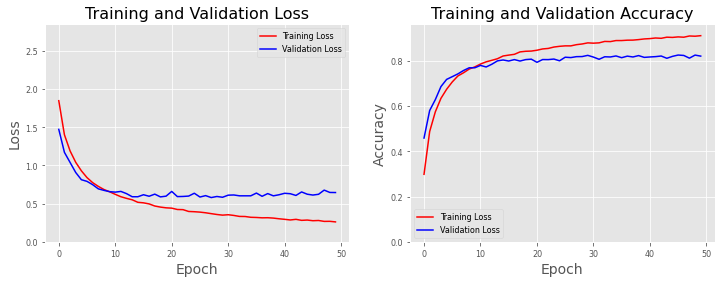

In [ ]:
# Adjusted #1 Answer sheet model (50,000 images)
learning_curve(history)

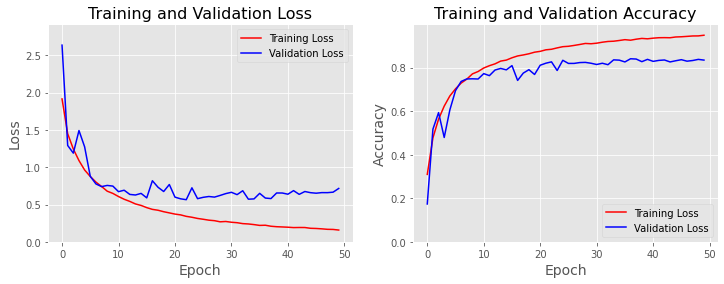

In [ ]:
# Adjusted #2 Answer sheet model (50,000 images)
learning_curve(history)

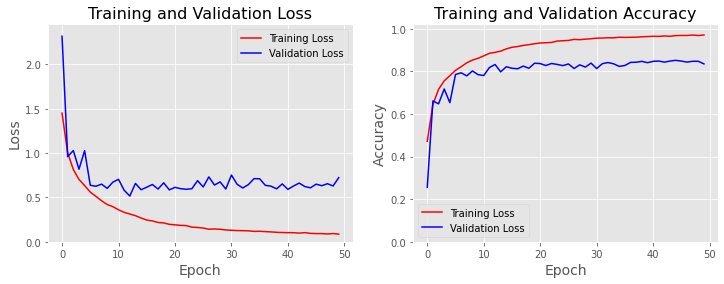

In [ ]:
# Adjusted #3 Answer sheet model (50,000 images)
learning_curve(history)

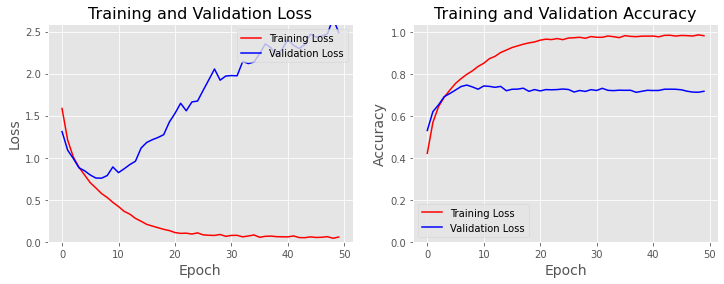

In [ ]:
# Baseline 2x VGG blocks model (50,000 images)
learning_curve(history)

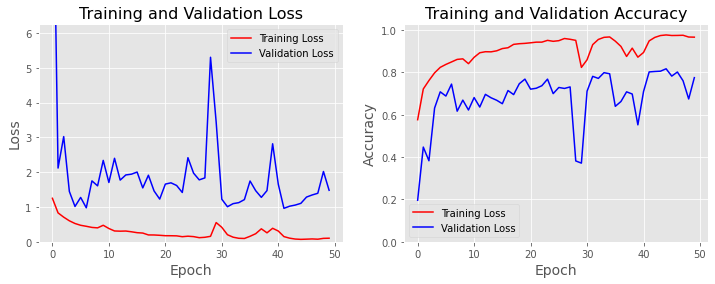

In [ ]:
# MobileNetV2 (50,000 images)
learning_curve(history)

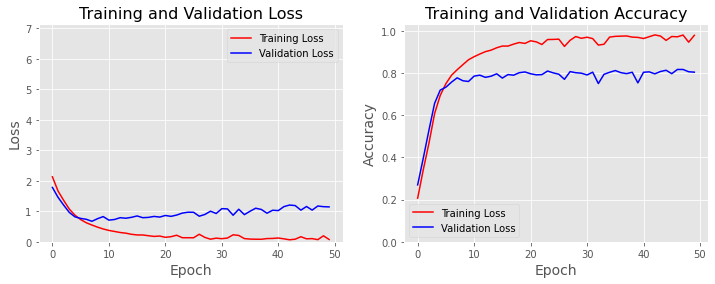

In [22]:
# VGG16 (50,000 images)
learning_curve(history)

**The best model tested so far seems to be the Answer sheet model which consists of VGG blocks**

Observations: 

* Increasing the training data from 25k to 50k images helped to improve model performance
* Decreasing model complexity in the fully connected layer and adding a couple of BatchNormalization layers did not help to reduce overfitting, but made it worse

## Results

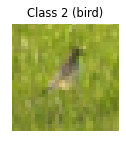

In [ ]:
check_one_image(data=X_test, label=predictions, actual=y_test, compare=True)

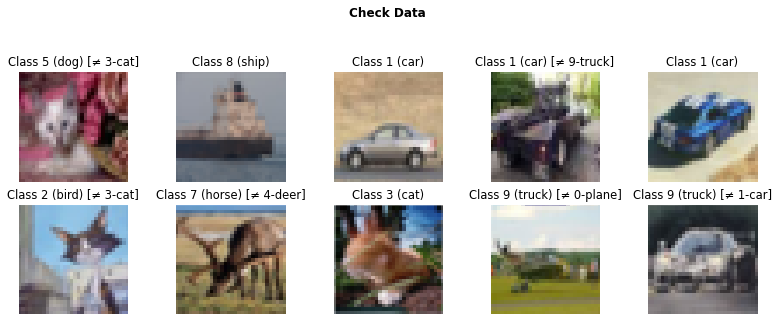

In [ ]:
check_ten_images(data=X_test, label=predictions, actual=y_test, compare=True)

## Save and Load models and weights

### Save

In [ ]:
# # save model
# model_json = model.to_json()
# with open('../data/model.json', 'w') as json_file:
#     json_file.write(model_json)
# # save weights
# model.save_weights('../data/model.h5')

### Load

In [ ]:
# # import the module to convert a json file to a model
# from keras.models import model_from_json

In [ ]:
# # create a new model
# new_model = Sequential()

In [ ]:
# # load model
# with open('../data/model.json', 'r') as json_file:
#     model_json = json_file.read()
# new_model = model_from_json(model_json)

# # load weights
# new_model.load_weights('../data/model.h5')

In [ ]:
# # compile the new model
# new_model.compile(optimizer = 'adam', 
#                   loss = 'categorical_crossentropy', 
#                   metrics = ['accuracy'])

**NOTE**: NO need to fit the new model as the weights are already set!

Use the new model to
- Predict
- Evaluate
- Chart



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



